In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import os
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np


current_dir = os.getcwd()
path_file = os.path.join(current_dir, "/content/drive/MyDrive/LG_data/DESAFIO04/product_quality_dataset.csv")
df = pd.read_csv(path_file, header=0)

df.head()

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type,Efficiency Score
0,2.87,24000,47.39,3.55,20,9.20,3,10,188,0,96
1,5.75,18000,44.66,3.28,30,12.01,5,6,297,1,77
2,4.66,30000,46.25,3.82,30,29.23,6,5,381,1,83
3,3.99,9000,40.67,2.72,18,17.42,3,9,299,1,75
4,1.78,30000,57.23,3.77,30,21.90,3,3,198,0,84


In [30]:
df.isnull().any()

,0
Power Consumption (kW),False
Cooling Capacity (BTU),False
Noise Level (dB),False
EER,False
Temperature Range (°C),False
Airflow (m³/min),False
Warranty (Years),False
Build Quality Rating,False
Maintenance Cost ($),False
Type,False


In [31]:
df.describe()

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type,Efficiency Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.451220,18807.000000,47.602570,3.528640,21.878000,18.879740,3.959000,5.551000,293.900000,0.491000,80.218000
std,1.460649,7808.887868,7.315986,0.567161,5.313695,6.301974,1.411138,2.963137,114.652864,0.500169,12.886448
min,1.020000,9000.000000,35.000000,2.500000,15.000000,8.040000,2.000000,1.000000,100.000000,0.000000,48.000000
25%,2.182500,12000.000000,41.040000,3.060000,18.000000,13.507500,3.000000,3.000000,188.000000,0.000000,70.000000
50%,3.485000,18000.000000,48.040000,3.540000,20.000000,18.830000,4.000000,6.000000,294.000000,0.000000,81.000000
75%,4.722500,24000.000000,53.850000,4.020000,25.000000,24.420000,5.000000,8.000000,392.000000,1.000000,91.000000
max,6.000000,30000.000000,59.990000,4.500000,30.000000,29.980000,6.000000,10.000000,499.000000,1.000000,100.000000


In [32]:
# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [33]:
# # Padronização dos dados
# import numpy as np

# df['Glucose'] = df['Glucose'].replace(0, np.nan)
# df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
# df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
# df['Insulin'] = df['Insulin'].replace(0, np.nan)
# df['BMI'] = df['BMI'].replace(0, np.nan)

# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [34]:
# df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
# df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
# df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
# df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
# df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

# # print('Numbers of rows with 0 values for each variable')
# # for col in df.columns:
# #     missing_rows = df.loc[df[col] == 0].shape[0]
# #     print(col + ': ' + str(missing_rows))

In [35]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# print('Numbers of rows with 0 values for each variable')
# for col in df_scaled.columns:
#     missing_rows = df_scaled.loc[df_scaled[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [36]:
df_scaled['Type'] = df['Type']
df = df_scaled
df.describe().loc[['mean', 'std', 'max', 'min'],].round(2).abs()

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type,Efficiency Score
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.49,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,1.00
max,1.75,1.43,1.69,1.71,1.53,1.76,1.45,1.50,1.79,1.00,1.54
min,1.67,1.26,1.72,1.81,1.30,1.72,1.39,1.54,1.69,0.00,2.50


In [37]:
# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [38]:
X = df.loc[:, df.columns != 'Type']
y = df.loc[:, 'Type']

In [39]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=1)

In [40]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (490, 10)
X_val shape: (210, 10)
X_test shape: (300, 10)
y_train shape: (490,)
y_val shape: (210,)
y_test shape: (300,)


In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
import pandas as pd

# Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/LG_data/DESAFIO04/product_quality_dataset.csv')
X = df.loc[:, df.columns != 'Type']
y = df['Type']

# Definir o modelo
model = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=100)

# Realizar a cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Acurácias em cada fold:", scores)
print("Acurácia média:", scores.mean())


Acurácias em cada fold: [0.49  0.51  0.49  0.525 0.505]
Acurácia média: 0.504


In [25]:
from sklearn import preprocessing

model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4772 - loss: 0.7293 - val_accuracy: 0.5524 - val_loss: 0.6925
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5428 - loss: 0.6951 - val_accuracy: 0.5476 - val_loss: 0.6943
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5397 - loss: 0.7017 - val_accuracy: 0.5381 - val_loss: 0.6961
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5626 - loss: 0.6866 - val_accuracy: 0.5286 - val_loss: 0.6968
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5555 - loss: 0.6800 - val_accuracy: 0.5333 - val_loss: 0.6981
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6076 - loss: 0.6647 - val_accuracy: 0.5333 - val_loss: 0.6999
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6196 - loss: 0.6621 - val_accuracy: 0.5238 - val_loss: 0.7016
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6110 - loss: 0.6678 - val_accuracy: 0.5143 - 

In [26]:
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_val, y_val)
print('Validation Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3938 
Training Accuracy: 83.88%

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5043 - loss: 0.8486 
Validation Accuracy: 48.10%

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5385 - loss: 0.7997 
Testing Accuracy: 53.67%



In [19]:
y_test_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Text(0, 0.5, 'True Positive Rate')

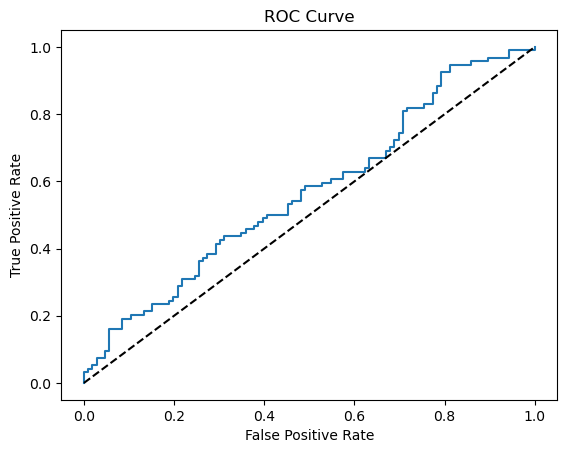

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

FPR, TPR, _ = roc_curve(y_test, y_test_pred)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')